In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from river import ensemble
from river import compose
from river import preprocessing
from river import tree

from source.folktables_dataset import FolktablesDataset
from source.river_utils import evaluate_binary_model

In [10]:
sns.set(rc={'figure.figsize':(15, 5)})

In [11]:
# Creating a data frame
df = pd.read_csv("../datasets/folktables-NY-2018.csv", delimiter=',')
df.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P,ESR
0,26,21,5,17,2,0,5,1,4,1,2,2,2,2,2,1,0
1,21,20,5,17,2,0,1,3,4,1,1,2,2,2,1,1,1
2,18,16,5,17,2,0,2,3,4,1,1,2,2,2,2,8,0
3,85,16,2,16,1,0,1,1,4,4,1,1,2,1,2,1,0
4,19,19,5,17,2,0,1,1,4,2,1,2,2,2,2,1,1


In [12]:
df.columns

Index(['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P', 'ESR'],
      dtype='object')

In [13]:
df['ESR'].value_counts()

0    105498
1     91469
Name: ESR, dtype: int64

In [14]:
dataset = FolktablesDataset()
counts = collections.Counter(y for _, y in dataset)

for c, count in counts.items():
    print(f'{c}: {count} ({count / sum(counts.values()):.5%})')

0: 105498 (53.56126%)
1: 91469 (46.43874%)


### Predict with River classification models

#### Apply data transformations

In [15]:
TARGET_COLUMN = 'ESR'
numerical_features = ['AGEP', 'SCHL']
categorical_features = [feature for feature in df.columns if feature not in numerical_features + [TARGET_COLUMN]]

transform_pipeline = compose.Select(categorical_features[0])
for feature in categorical_features[1:]:
    transform_pipeline += compose.Select(feature)
transform_pipeline |= preprocessing.OneHotEncoder()

for feature in numerical_features:
    transform_pipeline += compose.Select(feature)
transform_pipeline |= preprocessing.MinMaxScaler()

for idx, (x, y) in enumerate(dataset):
    print(f'Initial features: {x}\n')
    x = transform_pipeline.transform_one(x)
    print(f'Transformed features: {x}\n\n')
    if idx + 1 == 10:
        break

Initial features: {'AGEP': 26, 'SCHL': 21, 'MAR': '5', 'RELP': '17', 'DIS': '2', 'ESP': '0', 'CIT': '5', 'MIG': '1', 'MIL': '4', 'ANC': '1', 'NATIVITY': '2', 'DEAR': '2', 'DEYE': '2', 'DREM': '2', 'SEX': '2', 'RAC1P': '1'}

Transformed features: {'SCHL': 0.0, 'AGEP': 0.0, 'RAC1P_1': 0.0, 'SEX_2': 0.0, 'DREM_2': 0.0, 'DEYE_2': 0.0, 'DEAR_2': 0.0, 'NATIVITY_2': 0.0, 'ANC_1': 0.0, 'MIL_4': 0.0, 'MIG_1': 0.0, 'CIT_5': 0.0, 'ESP_0': 0.0, 'DIS_2': 0.0, 'RELP_17': 0.0, 'MAR_5': 0.0}


Initial features: {'AGEP': 21, 'SCHL': 20, 'MAR': '5', 'RELP': '17', 'DIS': '2', 'ESP': '0', 'CIT': '1', 'MIG': '3', 'MIL': '4', 'ANC': '1', 'NATIVITY': '1', 'DEAR': '2', 'DEYE': '2', 'DREM': '2', 'SEX': '1', 'RAC1P': '1'}

Transformed features: {'SCHL': 0.0, 'AGEP': 0.0, 'RAC1P_1': 0.0, 'SEX_2': 0.0, 'SEX_1': 0.0, 'DREM_2': 0.0, 'DEYE_2': 0.0, 'DEAR_2': 0.0, 'NATIVITY_2': 0.0, 'NATIVITY_1': 0.0, 'ANC_1': 0.0, 'MIL_4': 0.0, 'MIG_3': 0.0, 'MIG_1': 0.0, 'CIT_1': 0.0, 'CIT_5': 0.0, 'ESP_0': 0.0, 'DIS_2': 0.0, 'RELP

#### Predict with Adaptive Random Forest Classifier

Index: 1000; Accuracy: 83.18%; WeightedF1: 77.72%
Index: 2000; Accuracy: 82.59%; WeightedF1: 76.08%
Index: 3000; Accuracy: 82.23%; WeightedF1: 75.61%
Index: 4000; Accuracy: 82.57%; WeightedF1: 75.93%
Index: 5000; Accuracy: 82.40%; WeightedF1: 75.63%
Index: 6000; Accuracy: 82.68%; WeightedF1: 76.12%
Index: 7000; Accuracy: 83.01%; WeightedF1: 76.57%
Index: 8000; Accuracy: 83.34%; WeightedF1: 76.97%
Index: 9000; Accuracy: 83.18%; WeightedF1: 76.78%
Index: 10000; Accuracy: 83.33%; WeightedF1: 77.02%
Index: 11000; Accuracy: 82.51%; WeightedF1: 77.03%
Index: 12000; Accuracy: 81.94%; WeightedF1: 78.15%
Index: 13000; Accuracy: 81.48%; WeightedF1: 78.73%
Index: 14000; Accuracy: 81.21%; WeightedF1: 79.23%
Index: 15000; Accuracy: 80.85%; WeightedF1: 79.36%
Index: 16000; Accuracy: 80.71%; WeightedF1: 79.57%
Index: 17000; Accuracy: 80.51%; WeightedF1: 79.63%
Index: 18000; Accuracy: 80.63%; WeightedF1: 79.93%
Index: 19000; Accuracy: 80.46%; WeightedF1: 79.93%
Index: 20000; Accuracy: 80.43%; Weighted

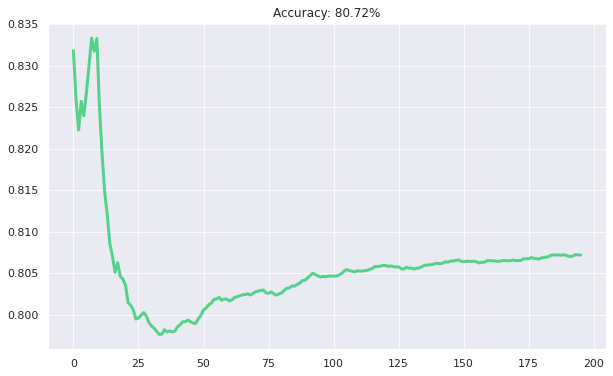

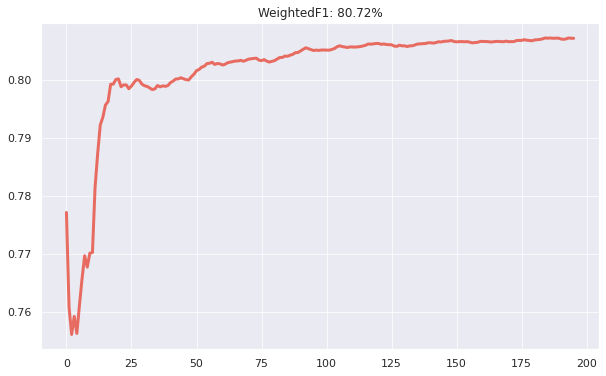

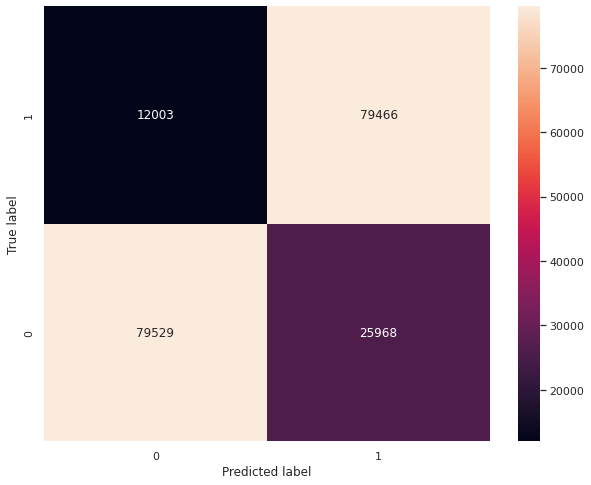

In [16]:
ARF_model = transform_pipeline | ensemble.AdaptiveRandomForestClassifier(n_models=10, seed=42, split_criterion='gini')
evaluate_binary_model(dataset, ARF_model)

#### Predict with Streaming Random Patches ensemble classifier

Index: 1000; Accuracy: 97.80%; WeightedF1: 97.41%
Index: 2000; Accuracy: 97.40%; WeightedF1: 97.05%
Index: 3000; Accuracy: 97.23%; WeightedF1: 96.72%
Index: 4000; Accuracy: 96.90%; WeightedF1: 96.23%
Index: 5000; Accuracy: 96.82%; WeightedF1: 96.20%
Index: 6000; Accuracy: 96.78%; WeightedF1: 96.11%
Index: 7000; Accuracy: 96.83%; WeightedF1: 96.16%
Index: 8000; Accuracy: 96.69%; WeightedF1: 96.00%
Index: 9000; Accuracy: 96.56%; WeightedF1: 95.83%
Index: 10000; Accuracy: 96.49%; WeightedF1: 95.79%
Index: 11000; Accuracy: 96.39%; WeightedF1: 95.73%
Index: 12000; Accuracy: 96.37%; WeightedF1: 95.76%
Index: 13000; Accuracy: 96.28%; WeightedF1: 95.65%
Index: 14000; Accuracy: 96.18%; WeightedF1: 95.55%
Index: 15000; Accuracy: 95.98%; WeightedF1: 95.37%
Index: 16000; Accuracy: 95.74%; WeightedF1: 95.12%
Index: 17000; Accuracy: 95.66%; WeightedF1: 95.09%
Index: 18000; Accuracy: 95.60%; WeightedF1: 95.02%
Index: 19000; Accuracy: 95.61%; WeightedF1: 95.04%
Index: 20000; Accuracy: 95.51%; Weighted

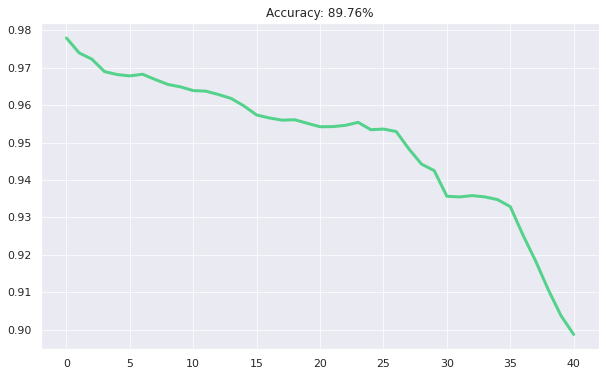

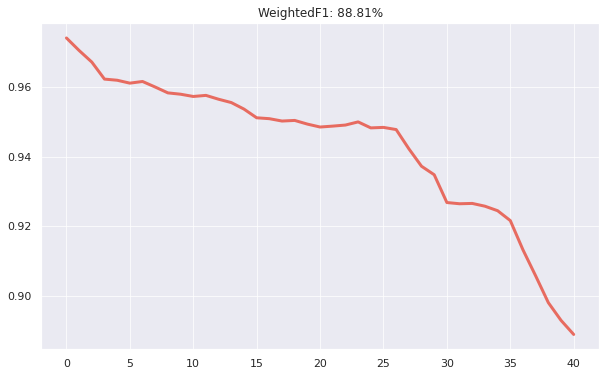

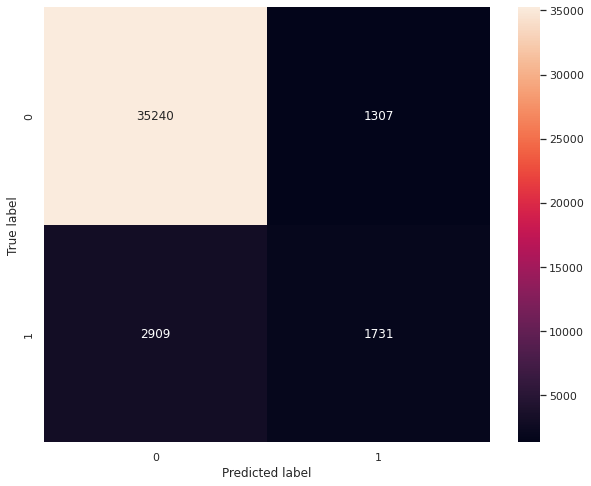

In [219]:
base_model = tree.HoeffdingTreeClassifier(
     grace_period=50, delta=0.01
)
SRP_model_obj = ensemble.SRPClassifier(
     model=base_model, n_models=3, seed=42
)
SRP_model = transform_pipeline | SRP_model_obj
evaluate_binary_model(dataset, SRP_model, dataset_limit=60_000)